<a href="https://colab.research.google.com/github/alvinhugo/studi-kasus-03-kelompok-01/blob/main/Depok_Studi_Kasus_3_Kelompok_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Study Case 3**

Kelompok 1A
1. Alvinhugo Zuhdi Nurharyadi (11210940000031)
2. Della Wiyanti (11210940000014)
3. Zahra Tifani Apriliana (11210940000029)
4. Puput Hanifah Nuranisa (11210940000017)
5. Zahra Khotimah (11210940000003)
6. M. Ikhwan Farhat (11210940000007)

In [ ]:
# Loading Data:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import numpy as np
from collections import Counter
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline
try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/tangerang.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfT.shape

--2022-10-25 01:41:14--  https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65115 (64K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  63.59K  --.-KB/s    in 0.007s  

2022-10-25 01:41:14 (9.02 MB/s) - ‘data/jakarta.csv’ saved [65115/65115]

--2022-10-25 01:41:14--  https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 

((1024, 26), (998, 26), (128, 26))

In [ ]:
# Mengganti type data yang kurang tepat saat dibaca oleh python
dfD['LT'] = dfD['LT'].astype('float64')
dfD['garasi'] = dfD['garasi'].astype('category')
dfD['carport'] = dfD['carport'].astype('category')
dfD['lokasi'] = dfD['lokasi'].astype('category')
dfD['sertifikat'] = dfD['sertifikat'].astype('category')
dfD['hadap'] = dfD['hadap'].astype('category')
dfD.dtypes

created_at      object
LT             float64
LB             float64
KT             float64
KM             float64
garasi        category
carport       category
lokasi        category
sertifikat    category
listrik        float64
hadap         category
harga          float64
URL             object
deskripsi       object
dtype: object

## Imputasi Missing Value

In [ ]:
# Mengecek skewness pada variabel yg memiliki missing value di data gedung
dfD['listrik'].skew(axis = 0, skipna = True)

4.06080190795883

In [ ]:
https://colab.research.google.com/drive/1AWCfhygLHRwgkYelFiBirQ4RCg1chbRT?usp=sharing

In [ ]:
# Imputasi variabel yang terdapat missing value 
modus = dfD['garasi'].mode()[0]
dfD['garasi'] = dfD['garasi'].fillna(modus)
modus2 = dfD['carport'].mode()[0]
dfD['carport'] = dfD['carport'].fillna(modus2)
modus3 = dfD['hadap'].mode()[0]
dfD['hadap'] = dfD['hadap'].fillna(modus3)
modus4 = dfD['lokasi'].mode()[0]
dfD['lokasi'] = dfD['lokasi'].fillna(modus4)
modus5 = dfD['sertifikat'].mode()[0]
dfD['sertifikat'] = dfD['sertifikat'].fillna(modus5)
median6 = dfD['listrik'].mode()[0]
dfD['listrik'] = dfD['listrik'].fillna(median6)


In [ ]:
dfD = dfD.dropna(axis=1,how='all')
dfD = dfD.dropna(axis=0,how='all')
dfD = dfD.dropna()
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,6-12-2021,165,200.0,4.0,2.0,1.0,1.0,Sukmajaya,SHM,2200.0,Selatan,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,50,45.0,2.0,1.0,1.0,1.0,Cipayung,SHM,1300.0,Utara,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,50,36.0,2.0,1.0,1.0,1.0,Sawangan,SHM,1300.0,Barat,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50,45.0,2.0,1.0,1.0,1.0,Cimanggis,SHM,1300.0,Utara,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72,45.0,2.0,1.0,1.0,1.0,Sawangan,SHM,1300.0,Timur,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,2200.0,Utara,750.0,https://www.rumah123.com/properti/depok/hos928...,Rumah di Depok Timur
114,4-12-2021,72,45.0,2.0,1.0,1.0,1.0,Cimanggis,SHM,2200.0,Utara,1000.0,https://www.rumah123.com/properti/depok/hos928...,PERUMAHAN NUANSA PERMAI DEPOK
115,4-12-2021,40,40.0,2.0,1.0,1.0,1.0,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,1.0,1.0,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...


In [ ]:
# Mengecek kembali missing value di tiap variabel pada Data Rumah Jual Depok
dfD.isnull().sum()

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
hadap         0
harga         0
URL           0
deskripsi     0
dtype: int64

In [ ]:
# Mengecek apakah ada data yang sama (duplikasi) di Data Rumah Jual Depok
dfD.duplicated().sum()

0

## Statistika Deskriptif

In [ ]:
dfD.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LT,118.0,119.872881,171.402388,36.0,60.0,72.0,100.00,1024.0
LB,118.0,92.618644,92.630404,15.0,46.0,61.0,102.25,600.0
KT,118.0,2.737288,1.024720,2.0,2.0,3.0,3.00,7.0
KM,118.0,1.940678,0.980950,1.0,1.0,2.0,2.00,5.0
listrik,118.0,2154.237288,1089.078970,900.0,1300.0,2200.0,2200.00,10000.0
harga,118.0,1194.440678,1474.387409,41.0,485.0,810.0,1137.50,9000.0


In [ ]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   created_at  118 non-null    object  
 1   LT          118 non-null    float64 
 2   LB          118 non-null    float64 
 3   KT          118 non-null    float64 
 4   KM          118 non-null    float64 
 5   garasi      118 non-null    category
 6   carport     118 non-null    category
 7   lokasi      118 non-null    category
 8   sertifikat  118 non-null    category
 9   listrik     118 non-null    float64 
 10  hadap       118 non-null    category
 11  harga       118 non-null    float64 
 12  URL         118 non-null    object  
 13  deskripsi   118 non-null    object  
dtypes: category(5), float64(6), object(3)
memory usage: 10.9+ KB


## Visualisasi Data

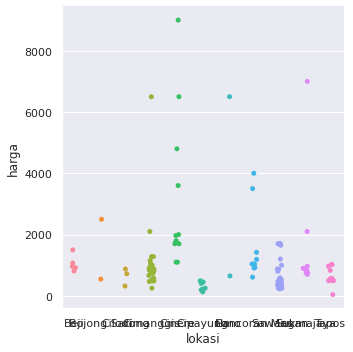

In [ ]:
# Distribusi Harga Rumah Berdasarkan Lokasi Rumah
p = sns.catplot(x="lokasi", y="harga", data=dfD)

#Interpretasi:
Berdasarkan visualisasi diatas, dapat dilihat pada penyebaran data di wilayah Tapos. Data mengumpul dibagian bawah dengan harga rumah < 2000 dan juga terdapat harga rumah yang mendekati 0. Hal ini sangat menarik, maka kami mengasumsikan, di wilayah tersebut harga rumah relatif murah. Sehingga dapat diprioritaskan untuk menjadikan investasi properti.

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


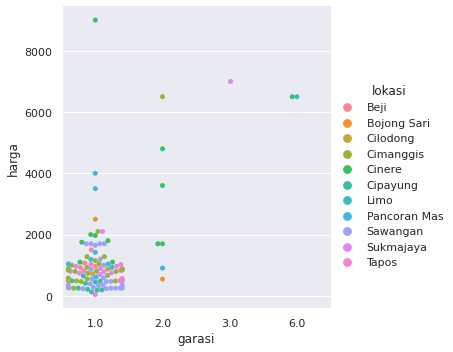

In [ ]:
# Distribusi Harga Rumah Berdasarkan Ketersediaan Garasi dan Lokasi Rumah
q = sns.catplot(x="garasi", y="harga", hue="lokasi", kind="swarm", data=dfD)

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


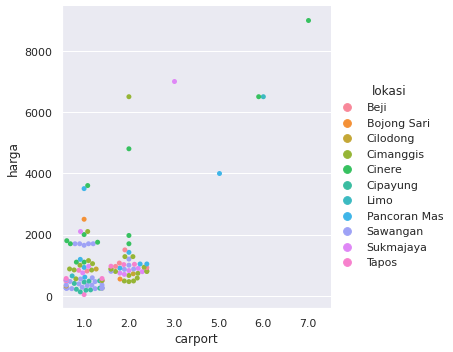

In [ ]:
# Distribusi Harga Rumah Berdasarkan Ketersediaan Carport dan Lokasi Rumah
r = sns.catplot(x="carport", y="harga", hue="lokasi", kind="swarm", data=dfD)

#Interpretasi:
Berdasarkan visualisasi di atas, terdapat informasi menarik yaitu dilihat dari lokasi rumah di wilayah Tapos. Pada lokasi rumah tersebut, terdapat rumah dengan jumlah ketersediaan carport 1, garasi 1, dan memiliki harga rendah < 2000. Menurut kami hal ini cukup menarik untuk diselidiki apakah rumah tersebut dalam keadaan layak huni atau tidak. Maka dari itu, diperlukan survei lebih lanjut untuk lokasi rumah di wilayah tersebut.

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 45.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


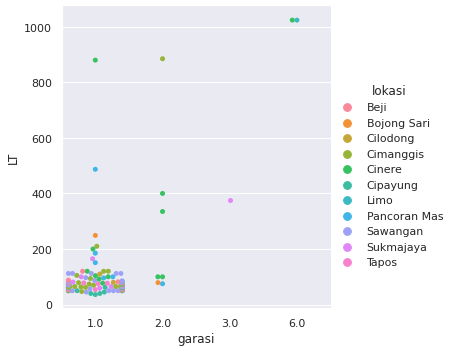

In [ ]:
# Distribusi Luas Tanah Rumah Berdasarkan Lokasi dan Ketersediaan Garasi
u = sns.catplot(x="garasi", y="LT", hue="lokasi", kind="swarm", data=dfD)


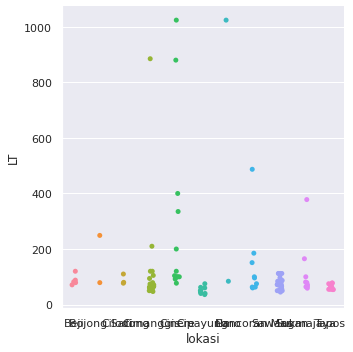

In [ ]:
# Distribusi Luas Tanah Berdasarkan Lokasi Rumah
p = sns.catplot(x="lokasi", y="LT", data=dfD)

#Interpretasi:
Berdasarkan visualisasi diatas, dapat dilihat pada lokasi rumah di wiilayah Cipayung. Dapat disimpulkan bahwa terdapat rumah-rumah dengan luas tanah tidak terlalu besar < 200, garasi kurang lebih 1, dan memiliki harga yang rendah. Maka menurut kami, hal ini dapat dijadikan pilihan untuk yang membutuhkan rumah yang minimalis.